In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="dark")


In [13]:
internet = pd.read_excel(r'..\Data\Internet-Accesos-por-tecno_por_loc.xlsx')

In [14]:
internet

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,31,0,3733,0,0,0,0,3764
3133,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,313,313
3134,TUCUMAN,Trancas,Villa de Trancas,90112030,126,0,0,0,33,0,0,101,260
3135,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1499,0,0,0,1,0,0,97,1597


In [15]:
df_grouped = internet.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS','Total general']].sum().reset_index()

In [16]:

df_grouped = df_grouped.sort_values('Total general', ascending=False)

df_grouped

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,325908,2767247,6199,1499149,63353,1227,1672,129910,4794665
1,CABA,138753,1238196,2145,138548,29586,95,0,4603,1551926
5,CORDOBA,152265,456947,68,367393,11128,167,61,61631,1049660
20,SANTA FE,163621,412157,110,248558,18984,148,0,44113,887691
12,MENDOZA,37655,77814,777,147080,1105,66,0,27607,292104
7,ENTRE RIOS,55507,135746,22,40798,12237,26,224,26414,270974
23,TUCUMAN,69441,20668,30,168717,453,44,0,4069,263422
16,SALTA,36939,97023,5,53470,6364,175,0,11884,205860
13,MISIONES,33204,87202,0,46885,7852,51,0,11075,186269
4,CHUBUT,45450,73923,904,9815,7796,150,0,30721,168759


Circular Barplot

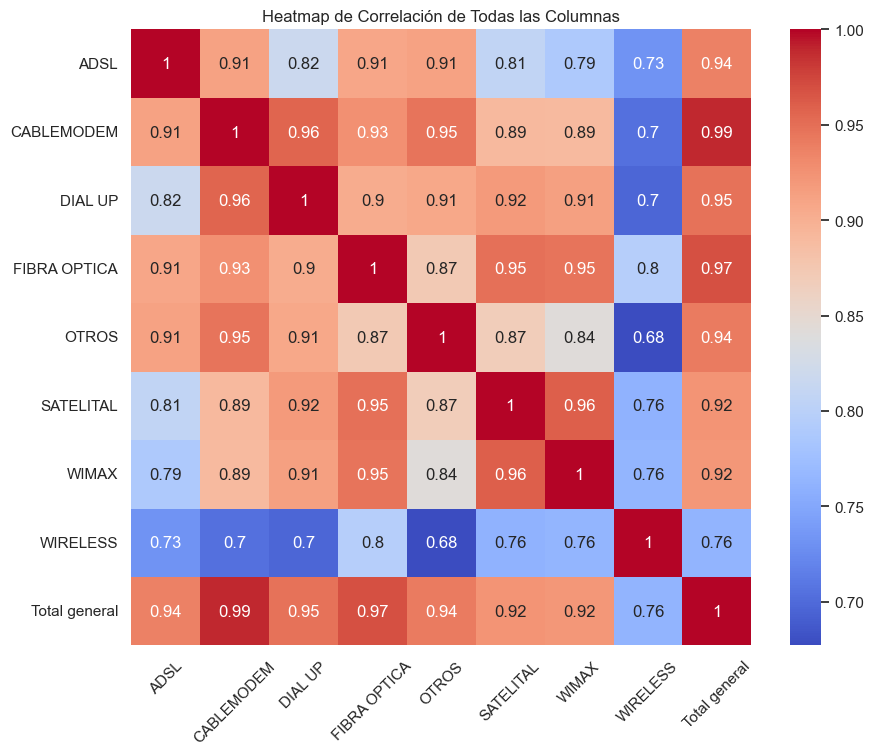

In [17]:
numeric_data = df_grouped.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

plt.title('Heatmap de Correlación de Todas las Columnas')
plt.tight_layout
plt.xticks(rotation=45)
plt.show()


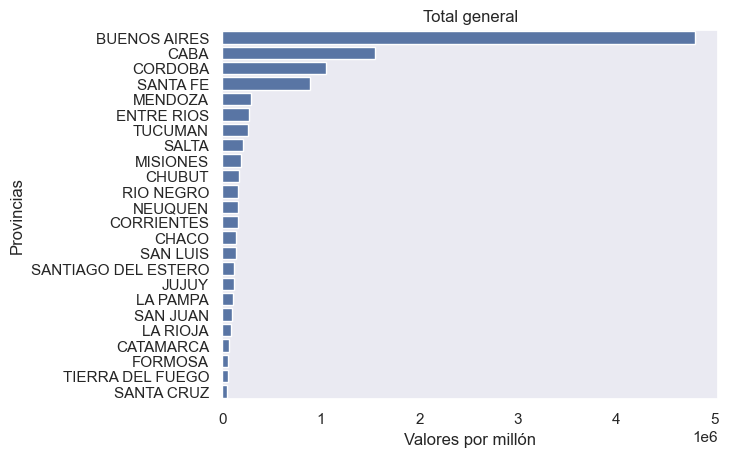

In [18]:
sns.barplot(x='Total general', y='Provincia', data=df_grouped, orient='h')

plt.xlabel('Valores por millón')
plt.ylabel('Provincias')
plt.title('Total general')

plt.show()

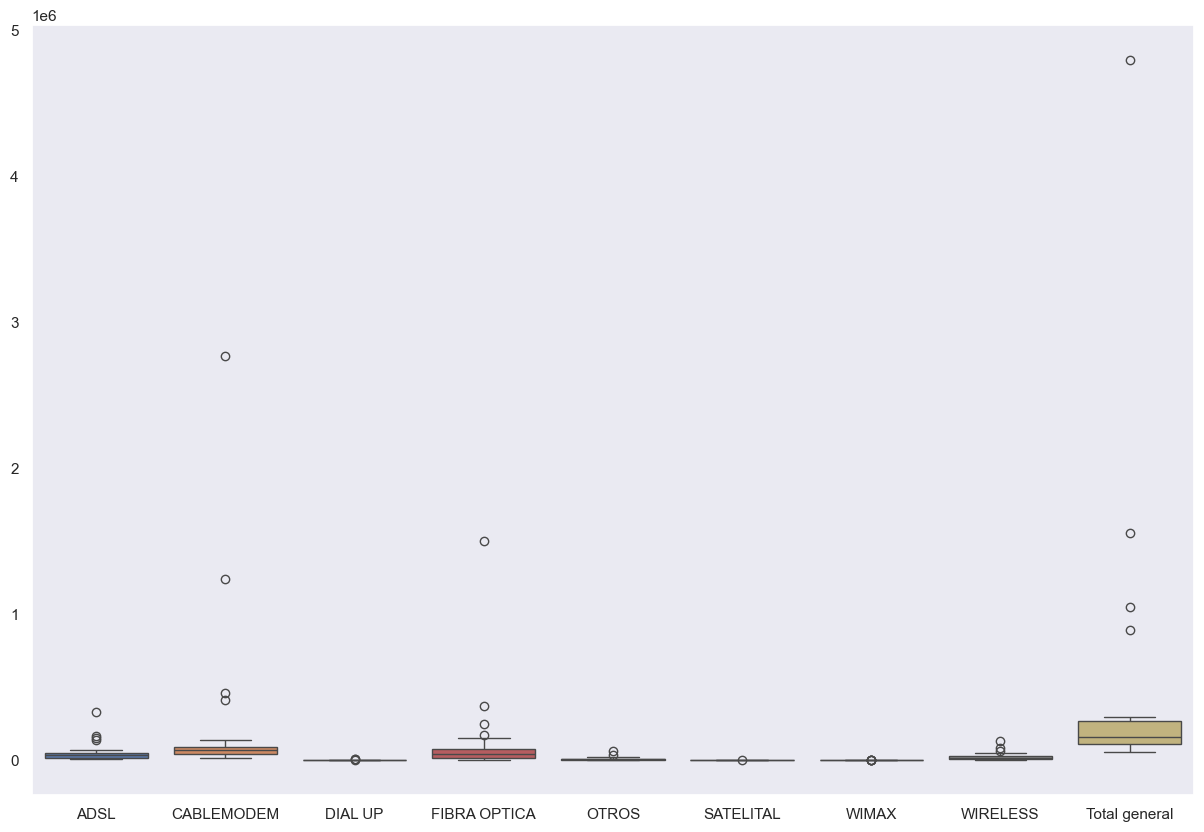

In [21]:

plt.figure(figsize=(15,10))
sns.boxplot(data=df_grouped)
plt.show()